In [2]:
# load libraries
import os
os.chdir('B:/Projects/CourseWork/coursework/RP5/data')

import numpy as np
import pandas as pd
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)

In [3]:
# load data omsk

df = pd.read_csv('omsk.csv', sep=';', skiprows=6)
df.rename(columns={ df.columns[0]: "time" }, inplace = True)
df['time'] =  pd.to_datetime(df['time'], format='%d.%m.%Y %H:%M')
df = df.set_index('time')
df = df.iloc[::-1]
# df = df.drop(columns=['P', 'Pa', 'ff10', 'ff3', 'Ch', 'Td', 'E', 'Tg', 'W1', 'W2', 'Cl', 'Nh', 'H', 'Cm', "E'", 'Unnamed: 29'])
df.head(2)

C:\Users\Dima\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,...,Ch,VV,Td,RRR,tR,E,Tg,E',sss,Unnamed: 29
time,,,,,,,,,,,,,,,,,,,,,
2005-02-01 06:00:00,-26.9,775.1,788.4,NaN,80.0,"Calm, no wind",0.0,NaN,NaN,20–30%.,...,"Cirrus fibratus, sometimes uncinus, not progre...",50.0,-29.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-01 09:00:00,-27.9,775.2,788.6,NaN,80.0,"Calm, no wind",0.0,NaN,NaN,20–30%.,...,"Cirrus fibratus, sometimes uncinus, not progre...",4.2,-30.3,NaN,NaN,NaN,NaN,Even layer of loose dry snow covering ground c...,49,NaN


In [4]:
# load data airport

dfa = pd.read_csv('airport.csv', sep=';', skiprows=6)
dfa.rename(columns={ dfa.columns[0]: "time" }, inplace = True)
dfa['time'] =  pd.to_datetime(dfa['time'], format='%d.%m.%Y %H:%M')
dfa = dfa.set_index('time')
dfa = dfa.iloc[::-1]
dfa.head(3)

C:\Users\Dima\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,T,P0,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td,Unnamed: 13
time,,,,,,,,,,,,,
2012-09-26 13:00:00,18.0,749.3,757.7,34.0,Wind blowing from the south-west,5.0,NaN,NaN,NaN,"Scattered clouds (40-50%) 990 m, broken clouds...",10.0 and more,2.0,NaN
2012-09-26 14:00:00,18.0,749.3,757.7,34.0,Wind blowing from the west-southwest,4.0,NaN,NaN,NaN,"Broken clouds (60-90%) 990 m, overcast (100%) ...",10.0 and more,2.0,NaN
2012-09-26 15:00:00,17.0,749.3,757.7,34.0,Wind blowing from the south-west,7.0,NaN,NaN,NaN,"Broken clouds (60-90%) 990 m, overcast (100%) ...",10.0 and more,1.0,NaN


In [5]:
# merge to one df for comparing
# get slice of data

#filter by time
dfa = dfa.loc[(dfa.index.time == datetime.time(0,0)) | (dfa.index.time == datetime.time(3,0)) | (dfa.index.time == datetime.time(6,0)) | (dfa.index.time == datetime.time(9,0)) | (dfa.index.time == datetime.time(12,0)) | (dfa.index.time == datetime.time(15,0)) | (dfa.index.time == datetime.time(18,0)) | (dfa.index.time == datetime.time(21,0))]

MONTH_START = 11
MONTH_END = 3
DAY_START = 1
DAY_END = 1

df_omsk = df[datetime.date(2012,MONTH_START,1):datetime.date(2013,MONTH_END,DAY_END)]
df_airport = dfa[datetime.date(2012,MONTH_START,DAY_START):datetime.date(2013,MONTH_END,DAY_END)]

df_omsk = df_omsk.append(df[datetime.date(2013,MONTH_START,DAY_START):datetime.date(2014,MONTH_END,DAY_END)])
df_airport = df_airport.append(dfa[datetime.date(2013,MONTH_START,DAY_START):datetime.date(2014,MONTH_END,1)])

df_omsk = df_omsk.append(df[datetime.date(2014,MONTH_START,DAY_START):datetime.date(2015,MONTH_END,DAY_END)])
df_airport = df_airport.append(dfa[datetime.date(2014,MONTH_START,DAY_START):datetime.date(2015,MONTH_END,1)])

df_omsk = df_omsk.append(df[datetime.date(2015,MONTH_START,DAY_START):datetime.date(2016,MONTH_END,DAY_END)])
df_airport = df_airport.append(dfa[datetime.date(2015,MONTH_START,DAY_START):datetime.date(2016,MONTH_END,DAY_END)])

df_omsk = df_omsk.append(df[datetime.date(2016,MONTH_START,DAY_START):datetime.date(2017,MONTH_END,DAY_END)])
df_airport = df_airport.append(dfa[datetime.date(2016,MONTH_START,DAY_START):datetime.date(2017,MONTH_END,DAY_END)])

df_omsk = df_omsk.append(df[datetime.date(2017,MONTH_START,DAY_START):datetime.date(2018,MONTH_END,DAY_END)])
df_airport = df_airport.append(dfa[datetime.date(2017,MONTH_START,DAY_START):datetime.date(2018,MONTH_END,DAY_END)])

df_omsk = df_omsk.append(df[datetime.date(2018,MONTH_START,DAY_START):datetime.date(2019,MONTH_END,DAY_END)])
df_airport = df_airport.append(dfa[datetime.date(2018,MONTH_START,DAY_START):datetime.date(2019,MONTH_END,DAY_END)])

df_omsk = df_omsk.append(df[datetime.date(2019,MONTH_START,DAY_START):datetime.date(2020,MONTH_END,DAY_END)])
df_airport = df_airport.append(dfa[datetime.date(2019,MONTH_START,DAY_START):datetime.date(2020,MONTH_END,DAY_END)])

df_merged = df_omsk[['T']].copy()
df_merged['T_a'] = df_airport['T']

df_merged['wind'] = df_omsk['DD']
df_merged['clouds'] = df_omsk['N']
df_merged['Nh'] = df_omsk['Nh']
df_merged['diff'] = df_merged['T'] - df_merged['T_a']
df_merged['abs_diff'] = abs(df_merged['T'] - df_merged['T_a'])
df_merged['H'] = df_omsk['H']
df_merged['Ff'] = df_omsk['Ff']
df_merged['ff10'] = df_omsk['ff10']

In [71]:
# show
# df_show = df_merged[abs(df_merged['diff']) > 1 ] # .sort_values(by=['diff'])
# df_show.groupby('wind', as_index=False)['diff', 'abs_diff'].mean()

df_merged.groupby('wind', as_index=False)[['diff', 'abs_diff']].mean()

,wind,diff,abs_diff
0,"Calm, no wind",-0.343949,1.298938
1,East,-0.610621,0.899399
2,North,-0.592612,1.062123
3,South,0.493377,0.857039
4,West,0.528110,0.810743


In [7]:
df_merged['wind'] = df_merged['wind'].replace(['Wind blowing from the west','Wind blowing from the south-west','Wind blowing from the west-southwest','Wind blowing from the west-northwest'],'West')
df_merged['wind'] = df_merged['wind'].replace(['Wind blowing from the north','Wind blowing from the north-west','Wind blowing from the north-northwest','Wind blowing from the north-northeast'],'North')
df_merged['wind'] = df_merged['wind'].replace(['Wind blowing from the east','Wind blowing from the north-east','Wind blowing from the east-southeast','Wind blowing from the east-northeast'],'East')
df_merged['wind'] = df_merged['wind'].replace(['Wind blowing from the south','Wind blowing from the south-east','Wind blowing from the south-southwest','Wind blowing from the south-southeast'],'South')

In [70]:
df_merged.groupby('wind', as_index=False)[['diff', 'abs_diff']].mean()

,wind,diff,abs_diff
0,"Calm, no wind",-0.343949,1.298938
1,East,-0.610621,0.899399
2,North,-0.592612,1.062123
3,South,0.493377,0.857039
4,West,0.528110,0.810743


In [11]:
df_merged[df_merged['T'] <= -15].groupby('wind', as_index=False)[['diff', 'abs_diff']].mean()

,wind,diff,abs_diff
0,"Calm, no wind",-0.507947,1.484768
1,East,-0.798596,1.036491
2,North,-0.964681,1.375745
3,South,0.882548,1.154711
4,West,0.989573,1.217378


In [12]:
df_merged[df_merged['T'] <= -20].groupby('wind', as_index=False)[['diff', 'abs_diff']].mean()

,wind,diff,abs_diff
0,"Calm, no wind",-0.710648,1.557870
1,East,-0.968915,1.152493
2,North,-1.023009,1.417699
3,South,0.890466,1.207539
4,West,0.925510,1.156122


In [13]:
df_merged[df_merged['T'] <= -25].groupby('wind', as_index=False)[['diff', 'abs_diff']].mean()

,wind,diff,abs_diff
0,"Calm, no wind",-0.933571,1.585000
1,East,-1.081410,1.240385
2,North,-1.166239,1.432906
3,South,0.642029,1.047826
4,West,0.756075,1.042056


In [19]:
df_merged[(df_merged['Ff'] >= 1.5) & (df_merged['T'] <= -25)].groupby('wind', as_index=False)[['diff', 'abs_diff']].mean()

,wind,diff,abs_diff
0,East,-0.803509,0.970175
1,North,-1.307463,1.314925
2,South,0.442373,0.740678
3,West,0.858974,1.105128


In [22]:
df_merged[(df_merged['abs_diff'] >= 2)].groupby('wind', as_index=False)[['diff', 'abs_diff']].mean()

,wind,diff,abs_diff
0,"Calm, no wind",-1.208772,2.850877
1,East,-2.361798,2.934831
2,North,-1.180153,2.903817
3,South,2.390909,2.679720
4,West,2.622672,2.749798


In [23]:
df_merged[(df_merged['abs_diff'] >= 2) & (df_merged['T'] <= -25)].groupby('wind', as_index=False)[['diff', 'abs_diff']].mean()

,wind,diff,abs_diff
0,"Calm, no wind",-2.178261,2.886957
1,East,-3.058621,3.058621
2,North,-2.346296,2.805556
3,South,1.813043,2.717391
4,West,2.153846,2.800000


In [72]:
#
df_merged.groupby(['Nh'])[['diff','abs_diff']].mean().sort_values('abs_diff', ascending=False)

,diff,abs_diff
Nh,,
no clouds,0.450430,1.194382
"10% or less, but not 0",0.388889,0.931746
20–30%.,0.478215,0.895013
"90 or more, but not 100%",0.277070,0.827389
40%.,0.159507,0.742606
50%.,0.185802,0.651235
60%.,0.089459,0.645676
70 – 80%.,0.045824,0.618284
100%.,-0.053405,0.575623


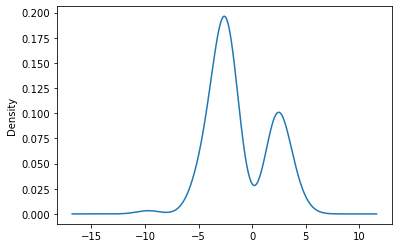

In [32]:
# plots below
df_merged[(df_merged['abs_diff'] >= 2) & (df_merged['wind'] == 'Calm, no wind')]['diff'].plot.kde()

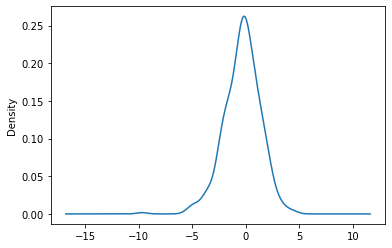

In [33]:
df_merged[ (df_merged['wind'] == 'Calm, no wind')]['diff'].plot.kde()

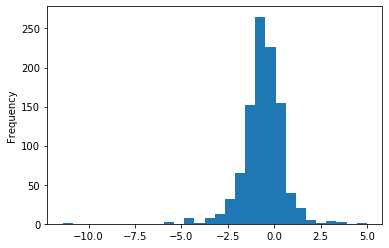

In [39]:
df_merged[ (df_merged['wind'] == 'East')]['diff'].plot.hist(bins=30)

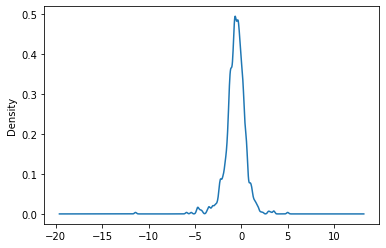

In [44]:
df_merged[ (df_merged['wind'] == 'East')]['diff'].plot.kde(bw_method=0.1)

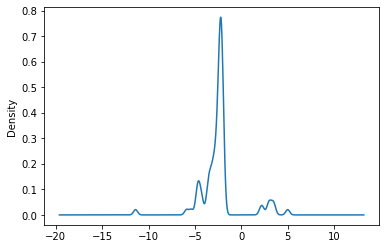

In [46]:
df_merged[(df_merged['abs_diff'] >= 2) & (df_merged['wind'] == 'East')]['diff'].plot.kde(bw_method=0.1)

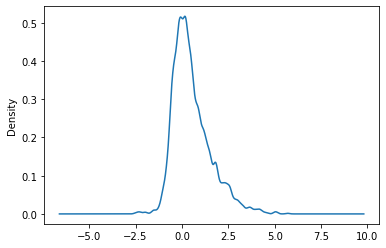

In [47]:
df_merged[ (df_merged['wind'] == 'West')]['diff'].plot.kde(bw_method=0.1)

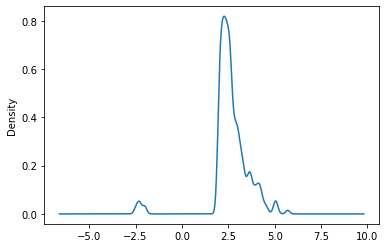

In [49]:
df_merged[(df_merged['abs_diff'] >= 2) & (df_merged['wind'] == 'West')]['diff'].plot.kde(bw_method=0.1)

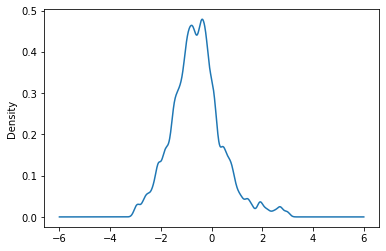

In [67]:
df_merged[(df_merged['wind'] == 'North') & (df_merged['abs_diff']<=3)]['diff'].plot.kde(bw_method=0.1)

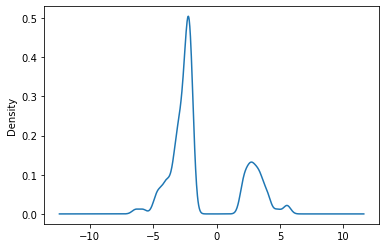

In [60]:
df_merged[(df_merged['abs_diff'] >= 2) & (df_merged['wind'] == 'North')]['diff'].plot.kde(bw_method=0.1)

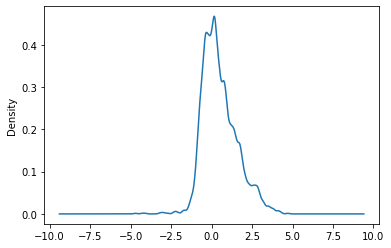

In [68]:
df_merged[ (df_merged['wind'] == 'South')]['diff'].plot.kde(bw_method=0.1)

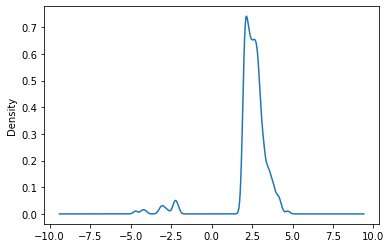

In [69]:
df_merged[(df_merged['abs_diff'] >= 2) & (df_merged['wind'] == 'South')]['diff'].plot.kde(bw_method=0.1)